# Part II - FordGoBike Dataset Exploration
## by Moayad Al-Khezayem

## Investigation Overview

> We successfully interpreted many insights from our dataset whether the insights are explatory or explanatory. The age range for all ages that use bikes varies from 18 to 100, but mostly clustred between 20  40. Another insight was about the relationship between the ages and the duration, we clearly saw from the scatter plot that ages between 20 and 40 have higher duration seconds comparing with older ages.
Also, we saw that even with females having much lower frequency in the data comparing with males, they have higher duration trips comparing with males.
Another insight is the age range of 70+ was surprisingly high with males and females which was not expected comparing with the duration_sec variable.

## Dataset Overview

> The datset has about 183k records and 16 variables.
> The 16 variables are: duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, intuser_type, member_birth_year  member_gender, strbike_share_for_all_trip

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('bikes_df_cleaned.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## 1- How's age effect bike trip duration?

> We can see in the next visualization the duration in minutes comparing with age of renting a bike.

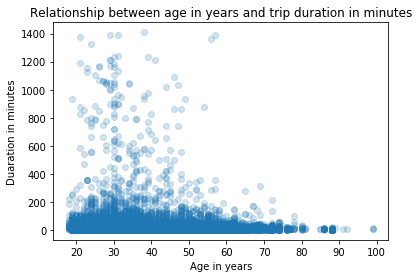

In [5]:
#Scatter plot for age and duration.
plt.scatter((2019 - df.member_birth_year), df['duration_sec'] / 60, alpha = 0.2);
plt.xlabel('Age in years');
plt.ylabel('Duaration in minutes');
plt.title('Relationship between age in years and trip duration in minutes');

plt.show();

## 2- What's the distirbution of genders comparing with age?

> From the next histogram we can see genders and thier frequency of renting a bike to compare between genders and age.


In [11]:
#Building a histogram function to reduce repetitive code.
def hist_g(gender):
    (2019 - (df[df['member_gender'] == gender]['member_birth_year'])).plot(kind = 'hist', bins = np.arange(0, 100, 1))

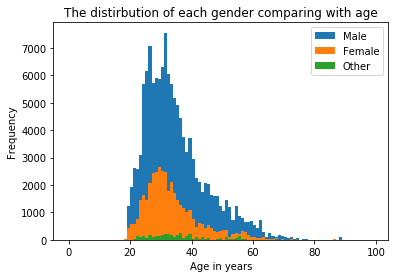

In [13]:
#Using the function for all genders in data.
for gender in df.member_gender.value_counts().index:
    hist_g(gender)

plt.legend(['Male', 'Female', 'Other'])
plt.xlabel('Age in years')
plt.title('The distirbution of each gender comparing with age');

## 3- How's bike trip duration is different comparing with age and gender?

> We can see in the next visualization the duration comparing with genders and age of renting a bike.

In [7]:
ages_range = []
ages = (2019 - df['member_birth_year'])
ages_range = np.where((ages > 18) & (ages <= 30), '18-30', np.nan)
ages_range = np.append(ages_range, np.where((ages > 30) & (ages <= 50), '30-50', np.nan))
ages_range = np.append(ages_range, np.where((ages > 50) & (ages <= 70), '50-70', np.nan))
ages_range = np.append(ages_range, np.where((ages > 70), '70+', np.nan))
ages_range = ages_range[ages_range != 'nan']

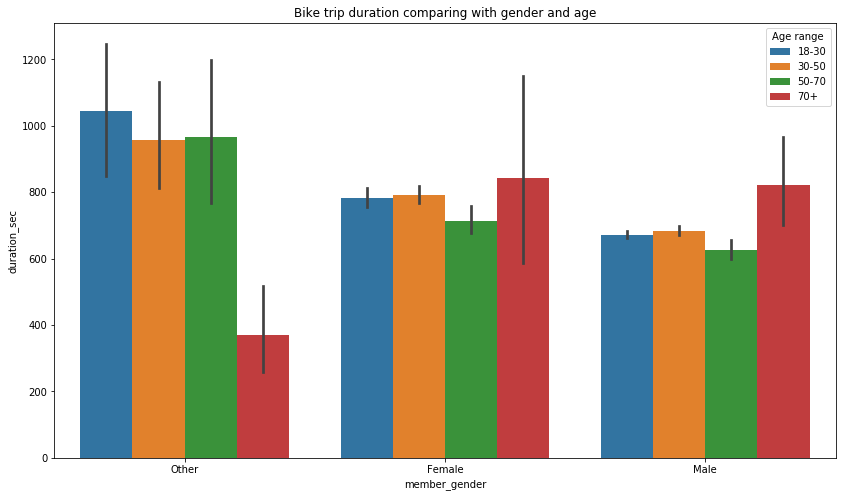

In [10]:
plt.figure(figsize=(14,8))
chart = sb.barplot(data = df, x = 'member_gender', y = 'duration_sec', hue = ages_range,
                    order = ['Other', 'Female', 'Male']);
chart.legend(title = 'Age range');
plt.title('Bike trip duration comparing with gender and age');

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve  --no-input --no-prompt